In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import colors

In [2]:
X, y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)
print(f"train accuracy = {model.score(X, y)}")

train accuracy = 0.93


In [3]:
x_min = np.min(X[:,0]) - 0.2
y_min = np.min(X[:,1]) - 0.2
x_max = np.max(X[:,0]) + 0.2
y_max = np.max(X[:,1]) + 0.2
plot_step_coarser = 0.1
    
xx_generator, yy_generator = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
grid_points = np.c_[xx_generator.ravel(), yy_generator.ravel()]
print(grid_points.shape)
grid_pred = model.predict(grid_points)

(646, 2)


In [15]:
y.shape

(100,)

In [16]:
y

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

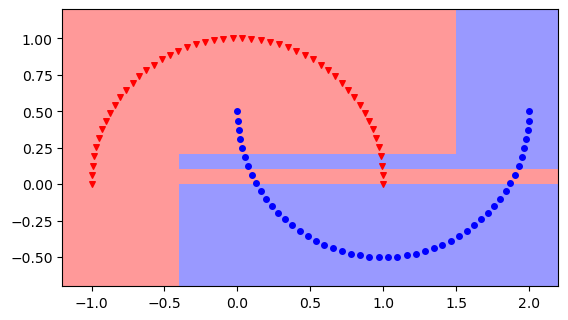

In [4]:
plt.figure()
cmap = colors.ListedColormap(['r','b'])

plt.scatter(X[y==0,0], X[y==0,1], c='r', marker='v', s=16)
plt.scatter(X[y==1,0], X[y==1,1], c='b', marker='o', s=16)
plt.gca().set_aspect('equal')
plt.imshow(np.flip(grid_pred.reshape((xx_generator.shape[0],xx_generator.shape[1])), axis=0), extent=[x_min, x_max, y_min, y_max], cmap=cmap, alpha=0.4)
plt.show()